In [40]:
import gower
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.manifold import TSNE
from pyod.models.kde import KDE
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors as knn
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score

In [2]:
path = "Data/dataset.csv"
# Load dataset
dataset = pd.read_csv(path, sep=";", decimal=",")
dataset = dataset.iloc[:, 1:-2]
dataset

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875
7196,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250
7198,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688


In [3]:
dist_matrix = gower.gower_matrix(dataset)

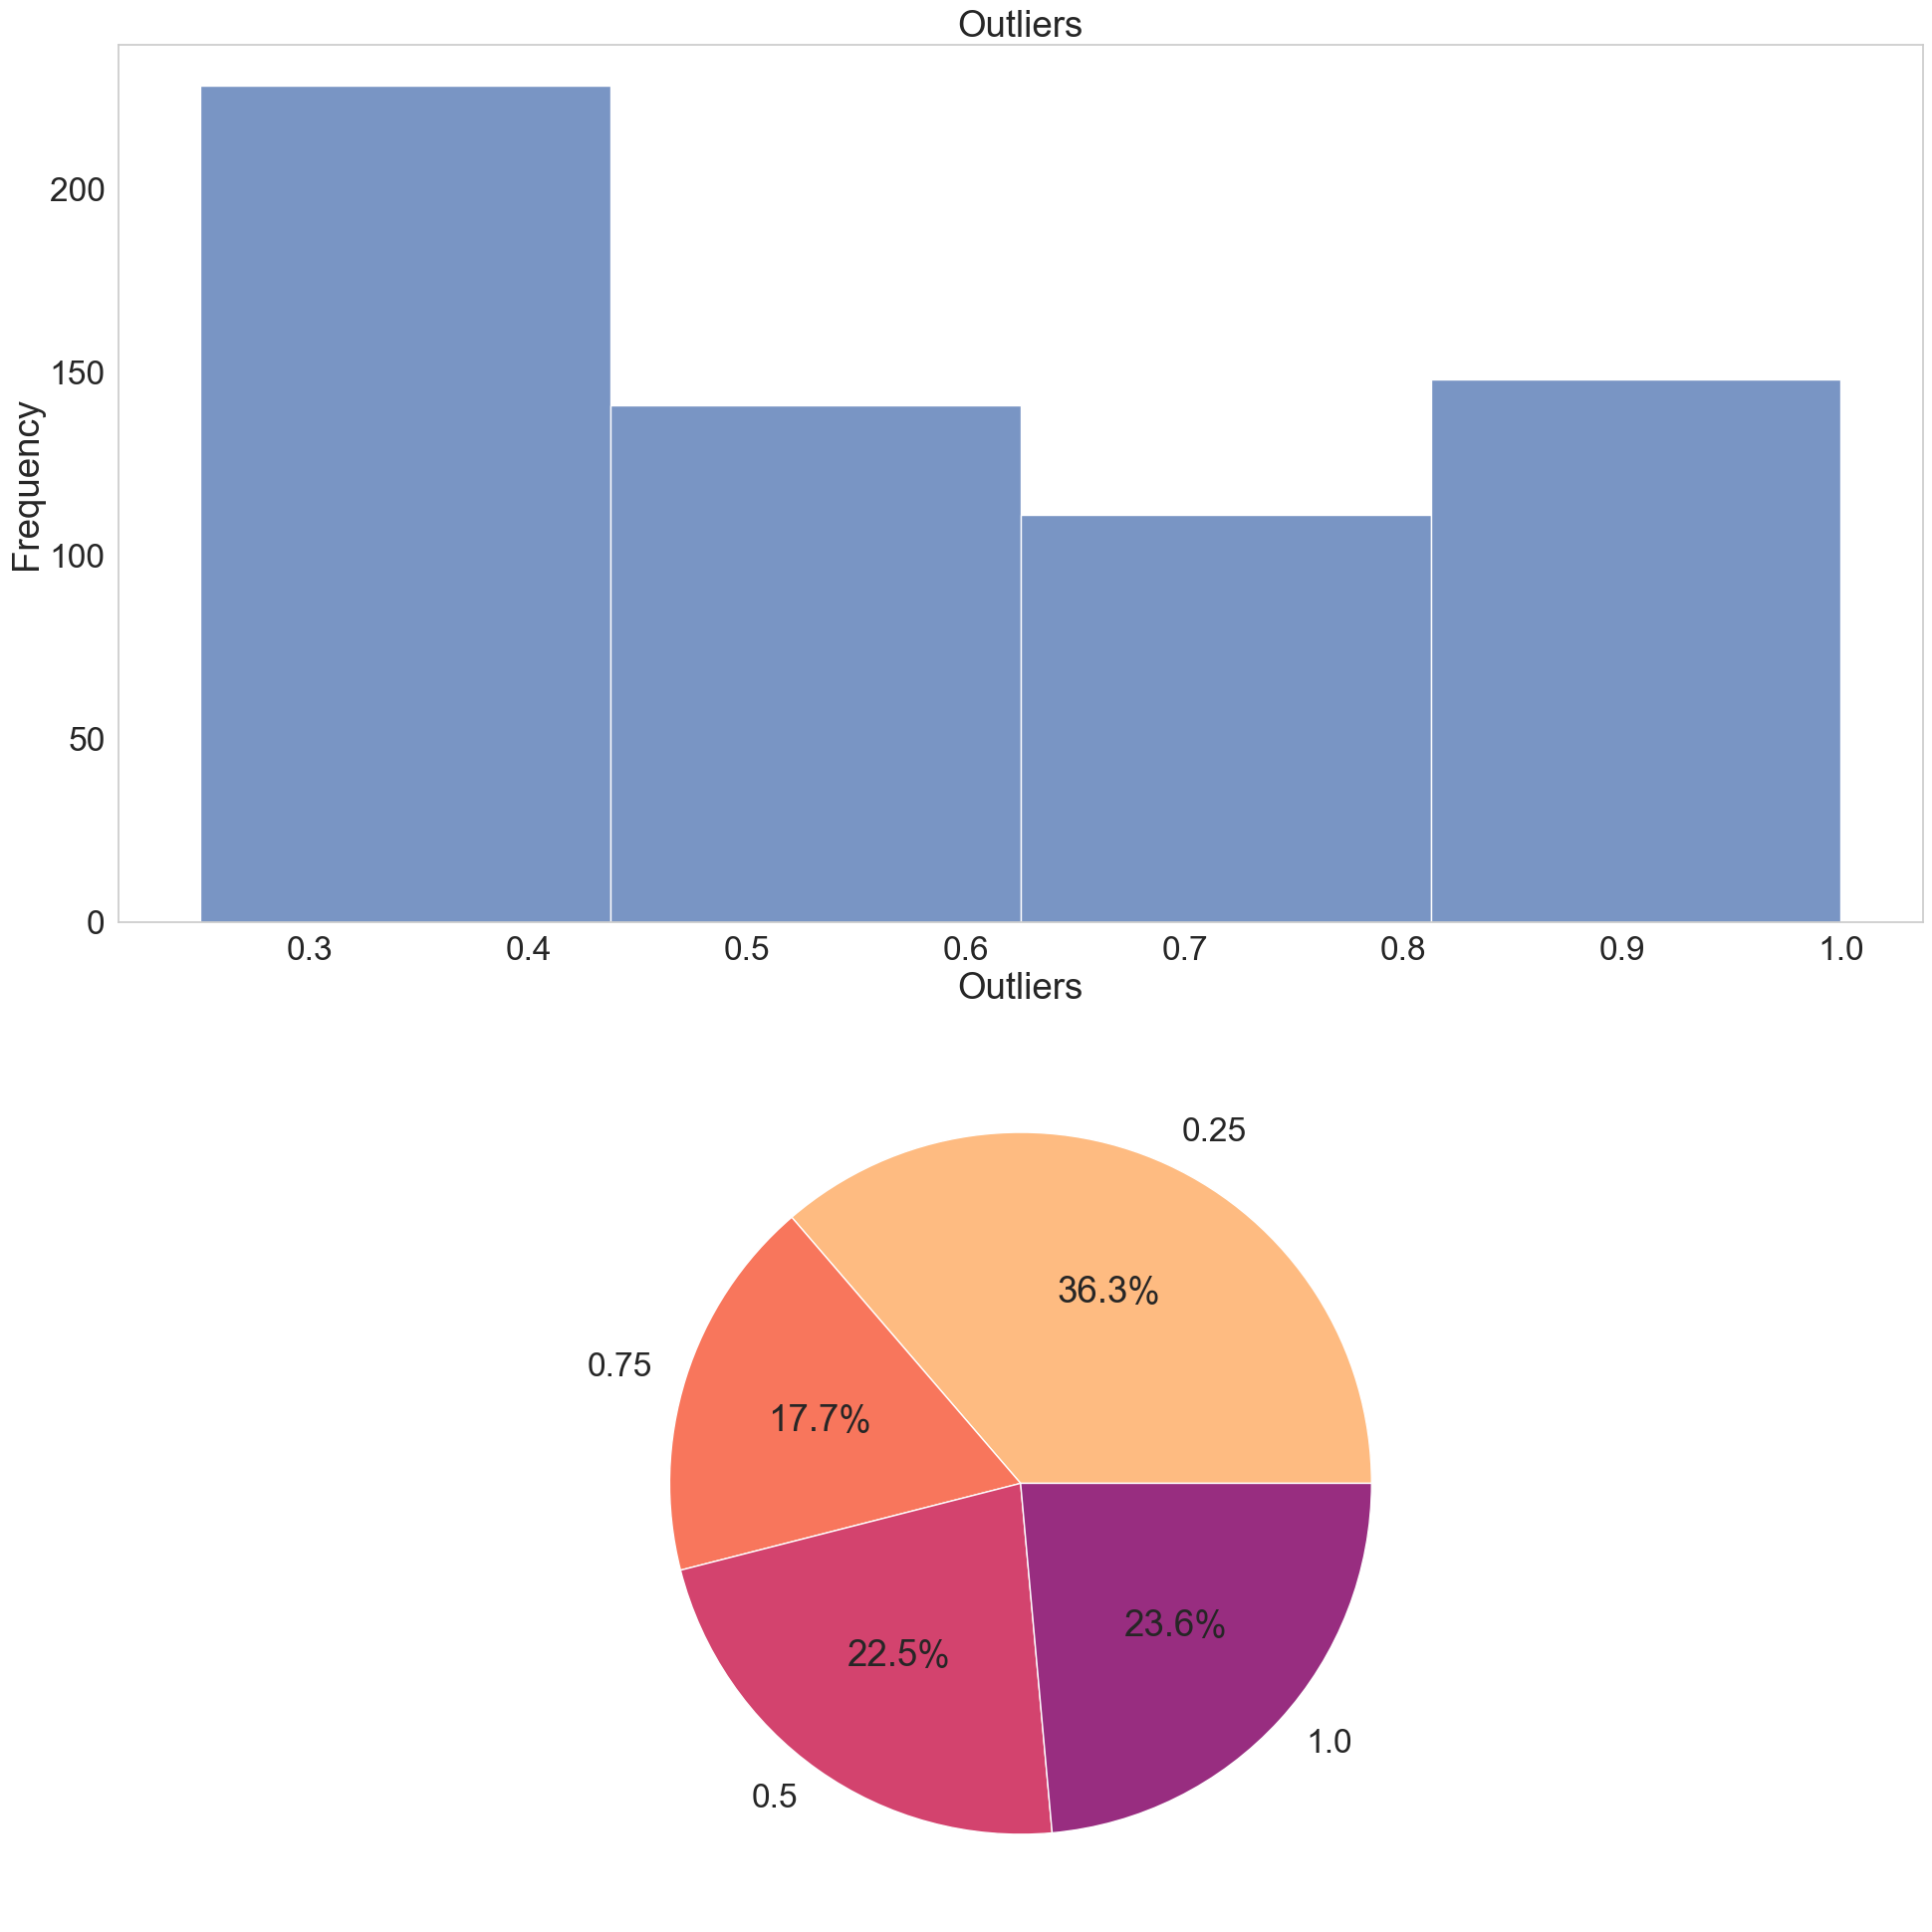

In [95]:
df= pd.read_csv("Data/outliers.csv")
# remove from the Outliers column the value 0
df = df[df["Outliers"] != 0]

levels = set(df['Outliers'])

fig, axs = plt.subplots(2, figsize=(20, 20))
sns.set(font_scale=2.2)
# Plot histogram
sns.histplot(df['Outliers'], bins=len(levels), ax=axs[0])
axs[0].set_title('Outliers')
axs[0].set_xlabel('Outliers')
axs[0].set_ylabel('Frequency')

# Plot pie chart
sizes = [len(df[df['Outliers'] == level]) for level in levels]
palette = sns.color_palette("magma_r", len(levels) + 2)
palette = palette[:-1]
axs[1].pie(sizes, labels=levels, autopct='%1.1f%%', colors=palette)

sns.set_style("whitegrid", {'axes.grid': False})
plt.tight_layout()
# plt.savefig("Media/outliersFrequency.png")
plt.show()

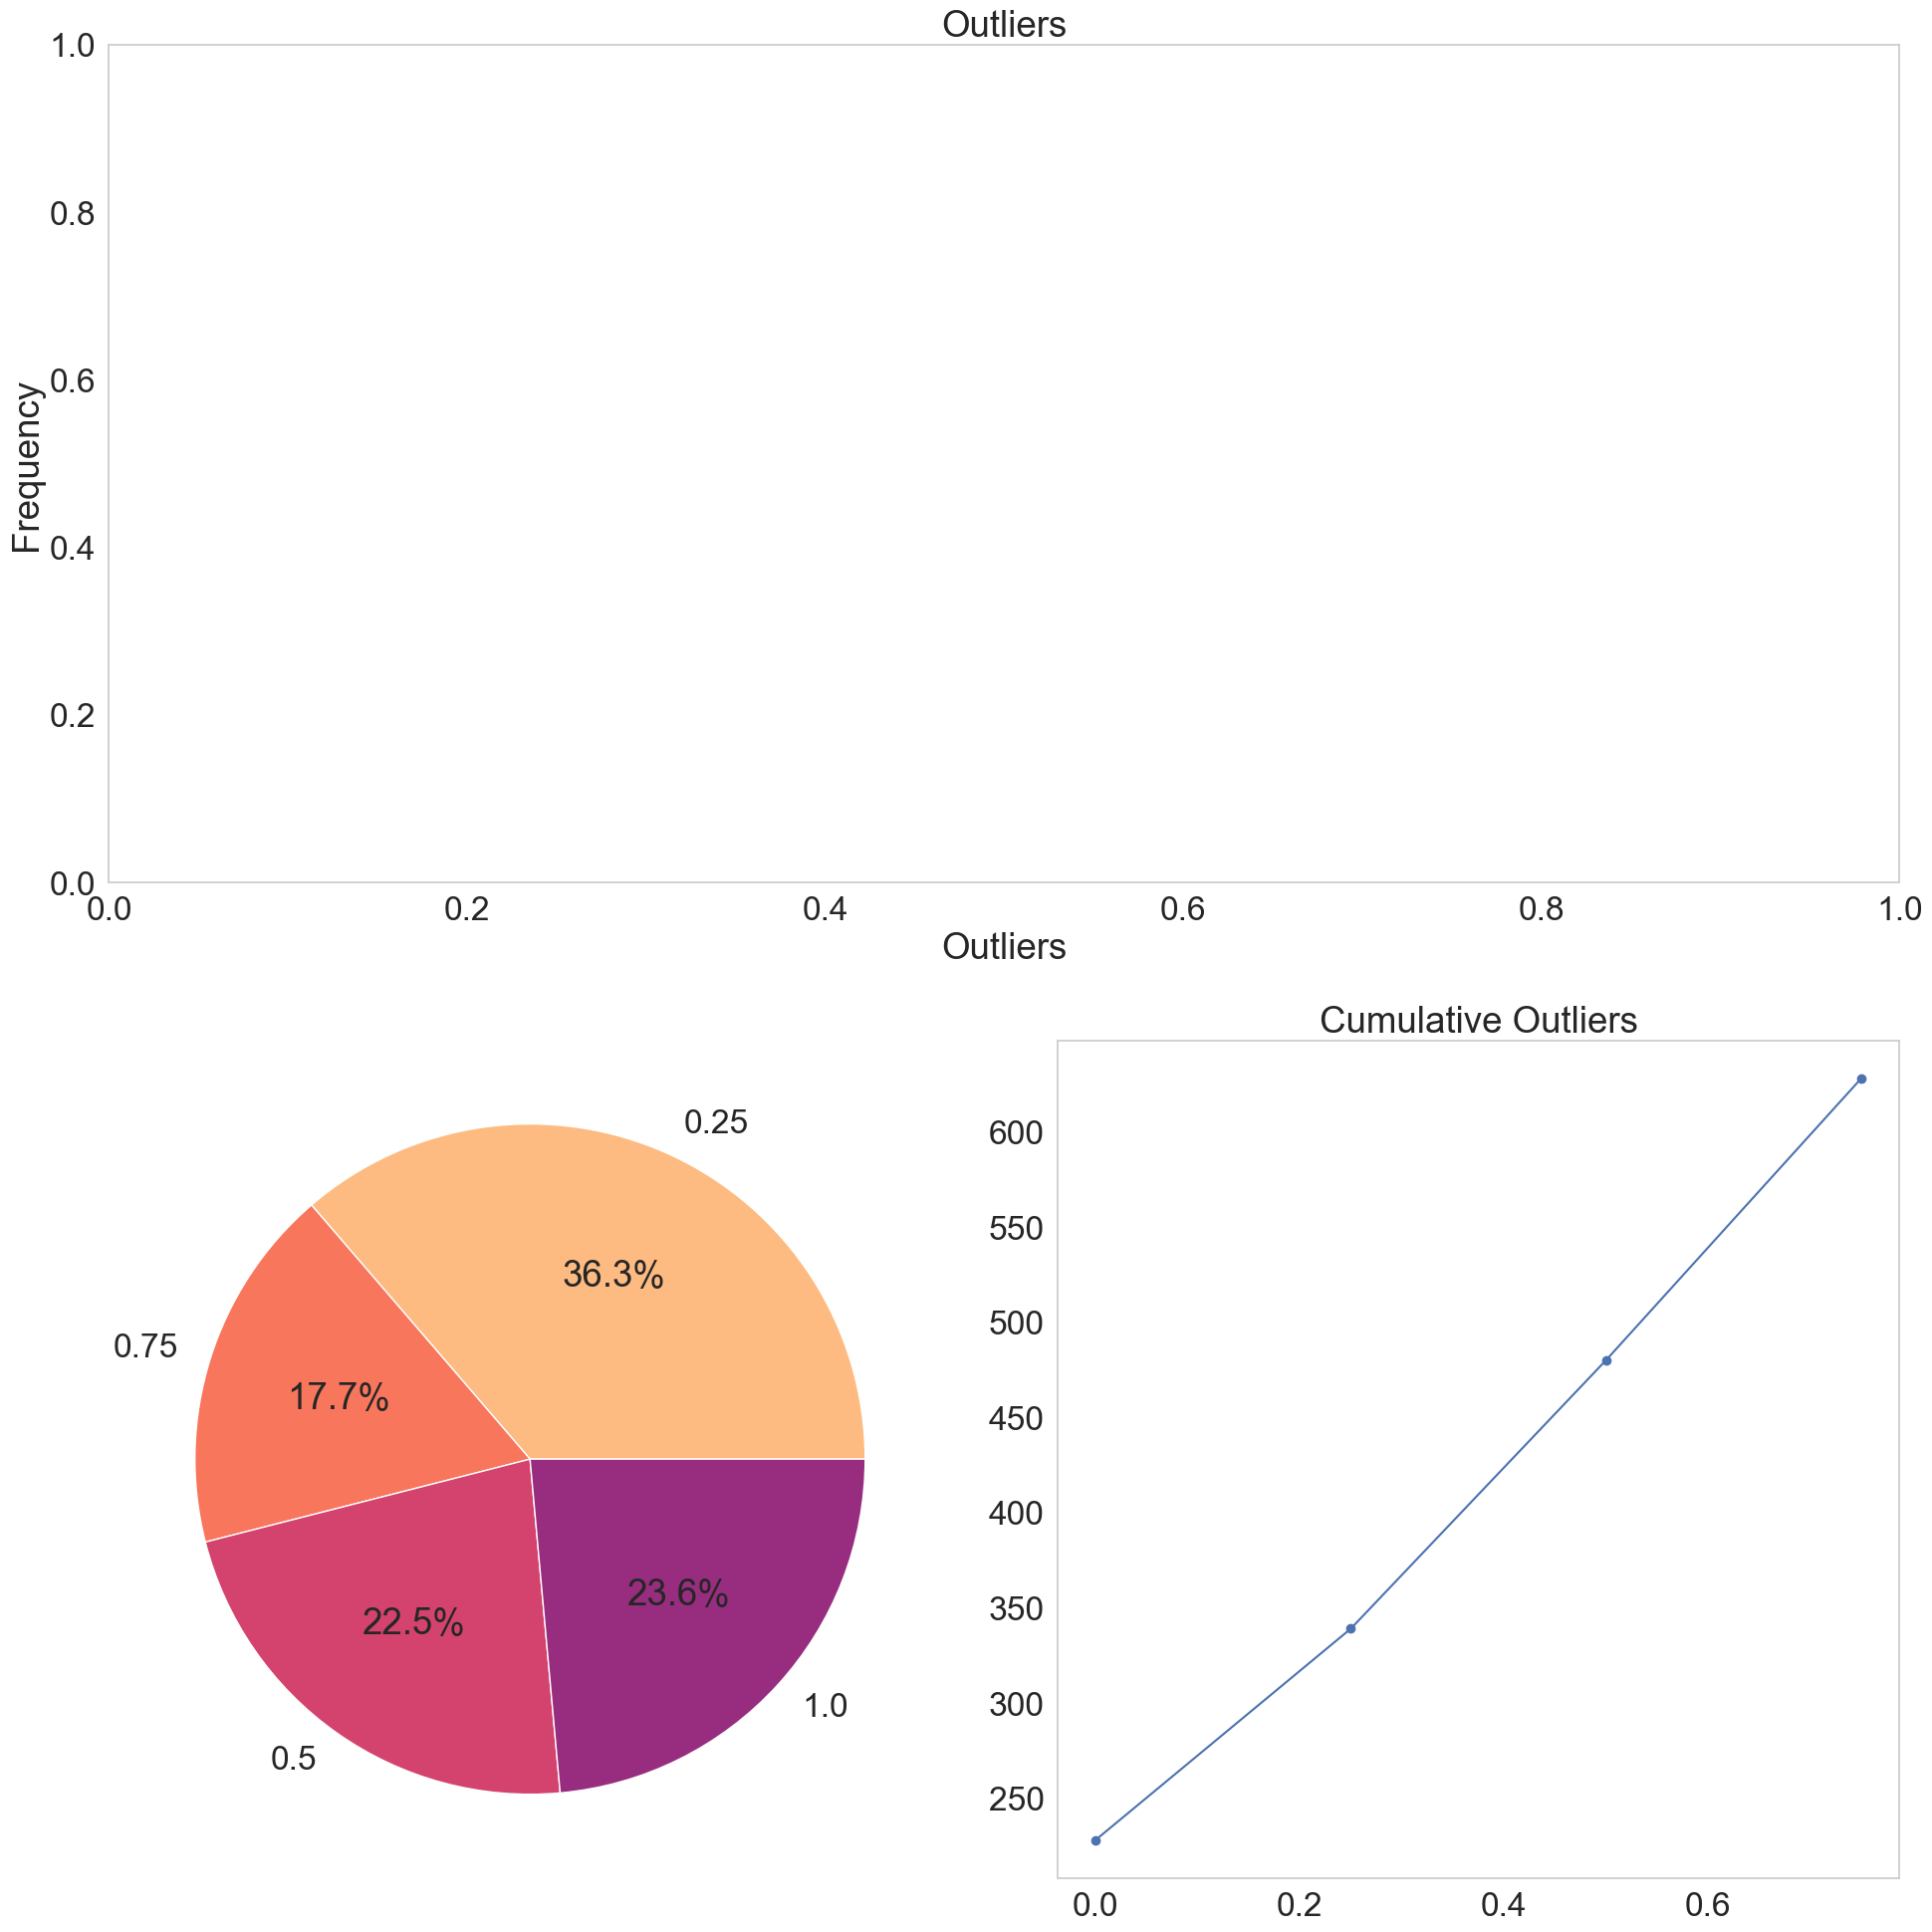

In [118]:
df= pd.read_csv("Data/outliers.csv")
# remove from the Outliers column the value 0
df = df[df["Outliers"] != 0]

levels = set(df['Outliers'])

fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)

sns.set(font_scale=2.2)
# Plot histogram
sns.histplot(df['Outliers'], bins=len(levels), ax=axs[0])
plt.title('Outliers')
plt.xlabel('Outliers')
plt.ylabel('Frequency')

# Plot pie chart
plt.subplot(2, 2, 3)
sizes = [len(df[df['Outliers'] == level]) for level in levels]
palette = sns.color_palette("magma_r", len(levels) + 2)
palette = palette[:-1]
plt.pie(sizes, labels=levels, autopct='%1.1f%%', colors=palette)
sns.set_style("whitegrid", {'axes.grid': False})

plt.subplot(2, 2, 4)
# plot the cumulative sum of the percentage of outliers
sizes = [len(df[df['Outliers'] == level]) for level in levels]
# transform the frequencies in percentages
nonPercentageSizes = sizes
sizes = [size / len(df) * 100 for size in sizes]
cumulative = np.cumsum(sizes)
nonPercentageSizes = np.cumsum(nonPercentageSizes)
# put on the x axis the number of outliers
plt.plot([0, 0.25, 0.5, 0.75],nonPercentageSizes,  marker='o')
plt.title('Cumulative Outliers')
sns.set_style("whitegrid", {'axes.grid': False})

plt.tight_layout()
# plt.savefig("Media/outliersFrequency.png")
plt.show()